이 글에서는 LULU(Lululemon Atheletica Inc.)라는 주식 자료를 시각화해보고, 그에 대해서 해석해보았다. 특히 해당 주식 추세선의 bollanger band를 그려보려고 하였다.

파이썬 코드는 [Compute Bollinger Bands for stocks with Python and Pandas](https://tcoil.info/compute-bollinger-bands-for-stocks-with-python-and-pandas)
에서 가져왔다.
여기에서 주식 종류를을 LULU로 지정하고, bollinger band를 그리는 것과 관련 없는 불필요한 코드를 모두 제거하여 코드를 구성했다.
그리고 각 줄에 대하여 설명을 적거나 관련 자료를 캡쳐나 링크 형식으로 적었다.

현재 aiffel linux 환경에서는 두 패키지(`pandas_reader`, `yfinance`)가 설치되어 있지 않다.
따라서 아래의 두 명령어를 실행시켜줘야 한다.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import yfinance
%matplotlib inline

 - Cell 1
 - line 1, 2
     - 첫 두 줄은, 이 jupyter notebook의 내용이 HTML형식에서 잘 출력되도록 하는 코드인 것 같다.
정확히 어떤 역할을 하는지는 잘 모르겠고, 대신 관련된 설명은 [여기](https://i.imgur.com/OSRHffl.png)에 있다.

 - line 4
     -`import pandas_datareader.data as pdr`
     - 원래 코드에서는 `pandas_datareader`라는 패키지를 `web`이라는 약어로 불렀다.
     하지만, 다른 자료들에서는 대부분 `pdr`이라는 약어를 쓰므로, 여기서는 `pdr`로 바꾸었다.

     - 이따가 Cell 3에서 `pdr` 패키지의 `get_data_yahoo`라는 메소드를 사용할 것이다.
     이 메소드에, 각 주식들의 별명을 입력하면, [yahoo finance](https://finance.yahoo.com/)에 등록되어 있는 주식 자료들을 `pandasDataFrame`형식으로 불러오게 된다.
     여기서 별명(ticker)이라 함은, 해당 사이트(yahoo finance)에서 각 주식들을 부르는 별칭이다.
     예를 들어 다음과 같은 별명들이 있다.
         - AAPL : 애플
         - AMZN : 아마존
         - SMSN.IL : 삼성전자
         - LULU : Lululemon Athletica Inc.

 - line 10
     - `%matplotlib inline`
     - 굳이 이 코드가 필요하지는 않은 것 같다.
     - 관련해서 [여기](https://github.com/govin08/aiffel/blob/master/004_article_and_materials/0902_%25matplotlib_inline.ipynb)에 정리해보았다.

In [2]:
# ___variables___
ticker = 'LULU'
start_time = datetime.datetime(2020, 9, 2)
end_time = datetime.datetime.now().date().isoformat()         # today
n = 20
m = 2

 - cell 2
     - 여기에서는 전체 코드의 변수들을 지정하는 셀이다.
 - line 2
    - 별명(ticker)을 'LULU'로 지정했다.
    - 이것은 Lululemon Athletica Inc.라는 회사를 지칭하는 별칭이다.
 - line 3
     - `start_time`을 2년 전 시점으로 바꾸었다.
 - line 5
     - `n`은 bollinger band를 계산할 때 필요한 window size의 값이다.
 - line 6
     - `m`도 bollinger band를 계산할 때 필요한 상수이다.
     moving average를 기준으로 위아래롤 2sigma인 순간을 `BU`, `BL`로 잡겠다는 말이다.

In [3]:
df = pdr.get_data_yahoo(ticker, start=start_time, end=end_time)
df = df.reset_index()
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-09-02,399.899994,387.079987,398.109985,398.290009,1631300,398.290009
1,2020-09-03,396.829987,376.369995,393.390015,377.869995,2412900,377.869995
2,2020-09-04,376.399994,345.970001,372.390015,361.410004,3111700,361.410004
3,2020-09-08,365.000000,348.500000,351.010010,349.799988,3512500,349.799988
4,2020-09-09,334.920013,315.250000,334.829987,323.929993,8543100,323.929993


 - cell 3  
     - 원래 더 많은 코드들이 있었다.
 인터넷 연결이 되어 있지 않았을 때, 어떻게 처리할 것인가 하는 사항들을 `try`, `except`를 사용해 지시한 코드가 있었다.
 하지만 지금 상황에서는 필요하지 않을 것 같아서 다 지우고 세 줄의 코드만을 남겼다.
 그래도 잘 돌아간다.
 
 - line 1
     -`pdr.get_data_yahoo` 메소드를 사용하여 `LULU`사의 주가 자료를 `DataFrame` 형식으로 가져왔다.
     - 그것을 `df`라는 이름으로 저장했다.
 - line 2
     - 원래 `df`의 index는 하루 하루의 날짜를 의미했다.
     - 하지만 `reset_index`라는 메소드를 활용함으로써, 이 index들을 초기화하고, 0, 1, 2로 나열되는 정수로서 인덱스를 간략화했다.
 - line 3
     - 맨 앞의 다섯 줄만 보이도록 출력했다.

In [4]:
TP = (df['High'] + df['Low'] + df['Close']) / 3
data = TP
B_MA = pd.Series((data.rolling(n, min_periods=n).mean()), name='B_MA')
sigma = data.rolling(n, min_periods=n).std() 
BU = pd.Series((B_MA + m * sigma), name='BU')
BL = pd.Series((B_MA - m * sigma), name='BL')
df = df.join(B_MA)
df = df.join(BU)
df = df.join(BL)

 - cell 4  
     - 이 셀도 원래는 조금 달랐다.
     bollinger_band라는 함수를 정의하고 나중에 사용했는데, 함수 형식으로 쓰면, 도저히 구조가 어떻게 되는 지 이해하기가 힘들어서, 그냥 풀어서 써보았는데, 다행히 잘 돌아간다.
     - 세부적인 설명은 생략한다.
     하지만 간략하게 말하면 다음과 같다.
 - line 1
     - `TP`는 typical price이다.
     이것은 고가(High)와 저가(Low) 그리고 종가(Close)의 평균으로 구한다.
     따라서 `TP`는 길이 504짜리의 `pd.Series`이다.
 - line 3, 5, 6
     - `B_MA`는 moving average이다.
     무엇의 moving average냐 하면, `TP`의 moving average이다.
     moving average의 smoothing period는 `n`=20으로 잡았다.
     bollinger band를 만들 때 이 moving average를 기준으로 한다.
     - `BU`는 bollinger band의 윗부분(upper)이다.
     `BL`은 아랫부분(lower)이다.
     각각 moving average를 기준으로 2 시그마 만큼을 더한 값과 뺀 값들의 나열이다.
     - 즉 `B_MA`, `BU`, `BL`은 모두 길이 504의 수열이다.
     정확하게는 길이 504의 `pd.Series`이다.
     - bollinger band에 대한 세부적인 설명은 여기에 잘 되어 있다. [bollinger band : investopedia](https://www.investopedia.com/terms/b/bollingerbands.asp)
 - line 7,8,9
     - 원래 자료인 `df`에 이 세개의 `pd.Series`를 붙였다.

In [5]:
df.head(30)

,Date,High,Low,Open,Close,Volume,Adj Close,B_MA,BU,BL
0,2020-09-02,399.899994,387.079987,398.109985,398.290009,1631300,398.290009,NaN,NaN,NaN
1,2020-09-03,396.829987,376.369995,393.390015,377.869995,2412900,377.869995,NaN,NaN,NaN
2,2020-09-04,376.399994,345.970001,372.390015,361.410004,3111700,361.410004,NaN,NaN,NaN
3,2020-09-08,365.000000,348.500000,351.010010,349.799988,3512500,349.799988,NaN,NaN,NaN
4,2020-09-09,334.920013,315.250000,334.829987,323.929993,8543100,323.929993,NaN,NaN,NaN
5,2020-09-10,336.279999,317.670013,326.899994,320.000000,3416600,320.000000,NaN,NaN,NaN
6,2020-09-11,323.000000,308.630005,323.000000,313.390015,3090400,313.390015,NaN,NaN,NaN
7,2020-09-14,317.750000,311.130005,315.989990,313.820007,1775600,313.820007,NaN,NaN,NaN
8,2020-09-15,319.000000,312.679993,318.329987,315.489990,1836700,315.489990,NaN,NaN,NaN
9,2020-09-16,317.429993,309.579987,316.320007,309.989990,1689900,309.989990,NaN,NaN,NaN


 - cell 5  
     - 처음 30개 행을 출력한다.
     - moving average의 window size가 20으로 설정되어 있으므로, 19번째부터 `B_MA`, `BU`, `BL`의 값이 출력되기 시작한다.

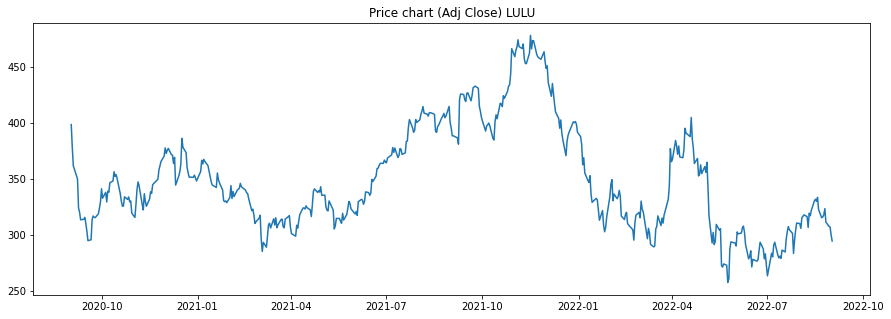

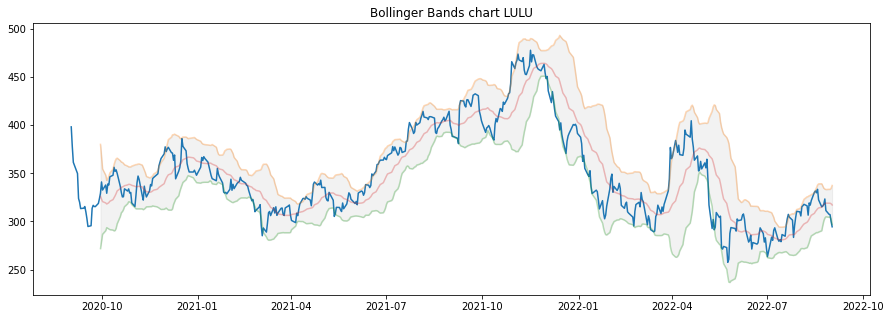

In [6]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('Bollinger Bands chart ' + str(ticker))
plt.plot(df['Date'], df['Adj Close'])
plt.plot(df['Date'], df['BU'], alpha=0.3)
plt.plot(df['Date'], df['BL'], alpha=0.3)
plt.plot(df['Date'], df['B_MA'], alpha=0.3)
plt.fill_between(df['Date'], df['BU'], df['BL'], color='grey', alpha=0.1)

plt.show()